In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io 

In [2]:
file=scipy.io.loadmat('D:/ML Andrew Ngs/Week4/machine-learning-ex3/ex3/ex3data1.mat')

In [3]:
theta=scipy.io.loadmat('D:/ML Andrew Ngs/Week4/machine-learning-ex3/ex3/ex3weights')

In [4]:
X= file['X']
Y= file['y']

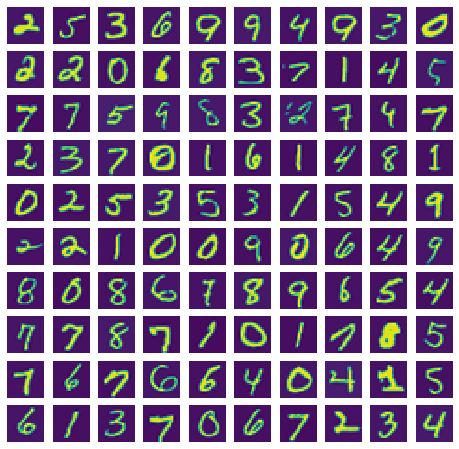

In [5]:
fig,ax=plt.subplots(nrows=10,ncols=10,figsize=(8,8))
#fig=plt.figure(figsize=(5,5))
for i in range(10):
    for j in range(10):
        ran=np.random.randint(X.shape[0])
        # We need to reshape our randomly selected row in (20,20) as our image data is 20X20 pixel
        # Here order of reshape does matter order='F' will give correct output of image
        ax[i,j].imshow(X[ran].reshape((20,20),order='F'))         
        ax[i,j].axis('off')

In [6]:
theta_1=theta['Theta1']
theta_2=theta['Theta2']

In [7]:
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))

In [8]:
m,n=X.shape[0],X.shape[1]

In [9]:
def sigmoid(a,b):
    z=np.dot(a,b)
    return(1/(1+np.exp(-z)))

In [10]:
def predict(theta1,theta2,X):
    s1,s2=X.shape[0],X.shape[1]
    z2=sigmoid(X,theta1.T)
    l1=np.ones((s1,1))
    z2=np.hstack((l1,z2))
    z3=sigmoid(z2,theta_2.T)
    prob = np.argmax(z3,axis=1)
    return(prob+1)

In [11]:
# measure the accuracy
pred = predict(theta_1, theta_2, X)
pred=pred.reshape((m,1))
print('Training Set Accuracy: {:.1f}%'.format(np.mean(pred == Y) * 100))

Training Set Accuracy: 97.5%


Prediction made by model is 4


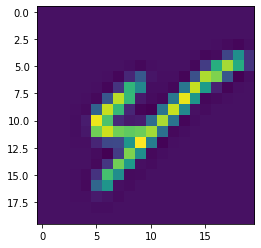

In [12]:
# Making the prediction
test1,test2=plt.subplots()
random_pick=np.random.randint(X.shape[0])

test2.imshow(X[random_pick,1:].reshape((20,20),order='F'))         

if predict(theta_1,theta_2,X[random_pick].reshape((1,n)))<10:
    print("Prediction made by model is {}".format(predict(theta_1,theta_2,X[random_pick].reshape((1,n)))[0]))
else:
    print("Prediction made by model is 0")
